<center><font size = "10"> Week 2 - Morphologies <center>
<center><font size = "8">Home work<center>

<font size = "3">Please, write your group number and the names and surnames of the group members here
<br>Group number:
<br>Group member1:
<br>Group member2:
<br>Group member3:
    
__IMPORTANT:__<font size = "3"> Exercises in <font color='red'>red</font> are mandatory assignements to be delivered by next Monday before 23:59.

# Optional: Create your favorite neuron
    
<font size ="3">Write code that builds a geometrical model of a neuron with one soma, one axon and two dendrites. Add three branches to the first dendrite. Set different geometrical properties to your morphology (diameter, lenght). Show the resulting model.  

In [1]:
# imports
import neurom as nm
from neurom import view
import matplotlib.pyplot as plt
from neuron import h
from hoc2swc import neuron2swc
from neurom.view.matplotlib_utils import (
    update_plot_limits,
)

--No graphics will be displayed.


In [2]:
# Defining the sections
soma = h.Section(name="soma")
first_dend = h.Section(name="first_dend")
sec_dend = h.Section(name="sec_dend")
axon = h.Section(name="axon")

first_branch = h.Section(name="first_branch")
second_branch = h.Section(name="second_branch")
third_branch = h.Section(name="third_branch")

# Geometry
soma.L = soma.diam = 15
first_dend.L = 100
first_dend.diam=5
sec_dend.L=100
sec_dend.diam = 5
axon.L = 200
axon.diam = 7
first_branch.L = 50
first_branch.diam = 3
second_branch.L = 50
second_branch.diam = 3
third_branch.L = 50
third_branch.diam = 3

# Topology
first_dend.connect(soma(1))
sec_dend.connect(soma(1))

axon.connect(soma(0))
first_branch.connect(first_dend(1))
second_branch.connect(first_dend(1))
third_branch.connect(first_dend(1))
h.topology()  # Check the topology


|-|       soma(0-1)
   `|       first_dend(0-1)
     `|       first_branch(0-1)
     `|       second_branch(0-1)
     `|       third_branch(0-1)
   `|       sec_dend(0-1)
 `|       axon(0-1)



1.0

Wrote cell 0 to cell_01hw.swc


cell_01hw.swc:7:warning

cell_01hw.swc:10:warning



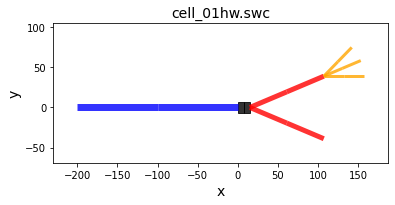

In [3]:
# Visualize in Noto
neuron2swc('cell_01hw.swc', swap_yz=False)
neuron = nm.load_morphology('cell_01hw.swc')
view.plot_morph(neuron);

# <font color= 'red'>Ex1:</font> Visualizing neurons

<font size ="3"> Select one of the neurons from your group data set. Write a code that visualize the neuron oriented on the three possible planes (xy, xz and yz), and in 3D, and plot each of its neurites (the neurites only need to be plotted in a single plane). Represent everything in the same plot (subplot). The main title of the figure should be the cell name. The subplots should have also their title (for example: 'plane xy' or 'neurite 2') and the axes of each subplot should be labeled. 
    
    
<font size ="3">Select one of the neurons from your group data set. Write code that generates two plots:
    
    1. Visualize the neuron oriented in the three possible planes (xy, xz, yz). 
    2. Visualize each of the neurites odf your morphoology(in a single plane).

<font size ="3"> For each visualization plot everything in a single plot (use subplots). Make sure to title the figure with cell name and the subplots with respective title (for example: 'plane xy' or 'neurite 2') and the axes of each subplot should be labeled. <font color= 'red'>[1.5 pts]

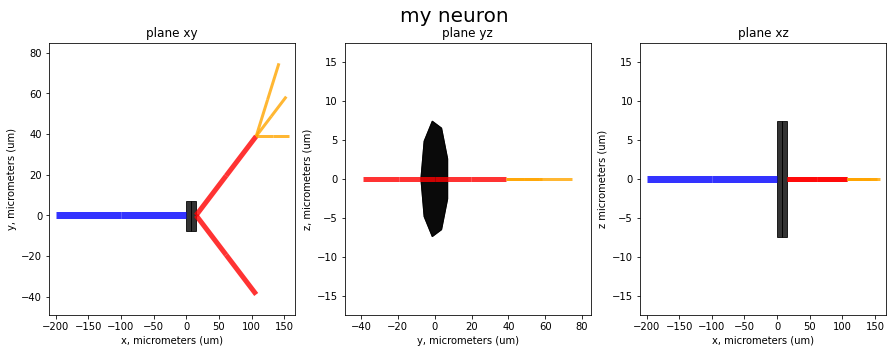

In [6]:

# plot neuron in different planes
planes = ['xy', 'yz', 'xz']
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, plane in enumerate(planes):
    view.plot_morph(neuron, plane=plane, ax=ax[i])
    update_plot_limits(
        ax[i], white_space=10
    )  # set your x, y plot limits to match with your neuron

    # the axis habndler is returend for further customization
    ax[i].set_title("plane "+plane)
    
fig.suptitle('my neuron', fontsize=20);
    
ax[0].set_xlabel("x, micrometers (um)")
ax[0].set_ylabel("y, micrometers (um)")
ax[1].set_xlabel("y, micrometers (um)")
ax[1].set_ylabel("z, micrometers (um)")
ax[2].set_xlabel("x, micrometers (um)")
ax[2].set_ylabel("z micrometers (um)");




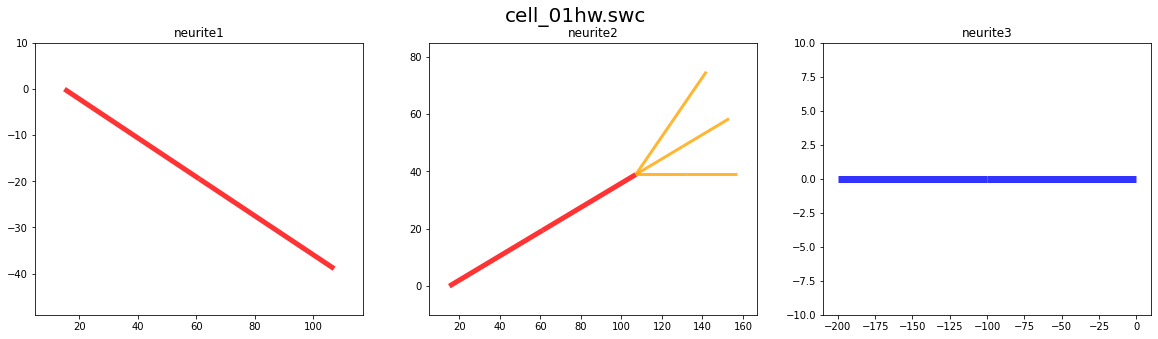

In [7]:
# plot neurites
neurites = neuron.neurites
# Plot each of the neurites separately
N = len(neurites)

# create N subplots, one for each neurite
fig, axes = plt.subplots(1, N, figsize=(20, 5))  # figsize in inches (width, height)

for i, neurite in enumerate(neurites):
    
    # draw the neurite in the i-th subplot
    # every time the function is called. The one that we created above will be used instead
    view.plot_tree(neurite, ax=axes[i], plane="xy")
    update_plot_limits(axes[i], white_space=10)

    # remove the title for each subplot
    axes[i].set_title("neurite"+str(i+1))

# set a global title for the figure
fig.suptitle(neuron.name, fontsize=20);

# <font color= 'red'>Ex2:</font> Check your set of morphologies for mistakes

<font size = "3">Work with the morphology files that correspond to your group, some of them are good morphology files and some have mistakes. Write down which files have errors, enumerate the errors in each file. You can use or copy here the code on Week2_Morphologies_CheckErrors_tut02.ipynb. Explain, in your own words, what each of these errors means, and give some ideas about how would you correct the mistakes from your bad morphology files. <font color= 'red'>[2 pts]

# <font color= 'red'>Ex3:</font> Morphometrics

<font size = "3">Now that you know which cells, out of your set of cells, are morphologically correct its time to analyze some characteristics of them. 

<font size = "3">Compute some morphometric characteristics of all the cells in your cell set that have no mistakes. Find the morphometric charachteristics that best enable you to classify the cells into different groups, such as:

    section_lengths, soma_volume, neurite_volume_density, ...

Plot the results for each metric in a histogram. Do you see any differences? If yes, explain them. Would using a combination of morphometric characteristics improve the classification?  <font color= 'red'>[2.5 pts]

<font size = "3">__IMPORTANT:__ as we have seen in the lecture, neurons have very different shapes. Some of them may even missed some parts that other neurons have, but this doesn't mean that their reconstruction is wrong. 

<font size = "3">Use the information given on the following papers to help you answer Ex2 and Ex3.

<font size = "3">[paper 1](https://www.nature.com/articles/nrn1519.pdf) 
    
<font size = "3">[paper 2](https://www.nature.com/articles/nrn2402.pdf)
    
<font size = "3">[paper 3](https://academic.oup.com/cercor/article/29/4/1719/5304727)